# GenAI with Python: Datapizza-AI Framework

### Setup

In [1]:
#pip install datapizza-ai
#pip install datapizza-ai-clients-openai-like

from datapizza.clients.openai_like import OpenAILikeClient

llm = "qwen3"

prompt = '''
You are an intelligent assistant, provide the best possible answer to user's request. 
''' 

ollama = OpenAILikeClient(api_key="", model=llm, system_prompt=prompt, base_url="http://localhost:11434/v1")

q = '''
what time is it?
'''

llm_res = ollama.invoke(q)
print(llm_res.text)

I don't have real-time access to the current time. You can check the time by looking at your device's clock, a search engine, or a world clock website. Let me know if there's anything else I can help you with!


### Chatbot

In [5]:
from datapizza.memory import Memory
from datapizza.type import TextBlock, ROLE

memory = Memory()
memory.add_turn(TextBlock(content=prompt), role=ROLE.SYSTEM)

while True:
    ## User
    q = input('🙂 >')
    if q == "quit":
        break
    
    ## LLM
    llm_res = ollama.invoke(q, memory=memory)
    res = llm_res.text
    print("🍕 >", f"\x1b[1;30m{res}\x1b[0m")

    ## Update Memory
    memory.add_turn(TextBlock(content=q), role=ROLE.USER)
    memory.add_turn(TextBlock(content=res), role=ROLE.ASSISTANT)

🙂 > hi


🍕 > Hello! How can I assist you today?


🙂 > what time is it?


🍕 > I'm sorry, as an AI, I don't have direct access to real-time information like the current time. Please check your device for the current time.


🙂 > im in Milan


🍕 > I'm unable to provide the current time directly since my capabilities are based on data available up to my last training in 2021. However, you can easily find out what time it is in Milan by checking your device or using an online clock. If you need any other information related to Milan, feel free to ask!


🙂 > its exactly noon


🍕 > In Milan, if it's exactly noon right now, the exact time would be 12:00 PM. Please let me know if you have any other questions or need further assistance!


🙂 > quit


In [7]:
memory.to_dict()

[{'role': 'system',
  'blocks': [{'type': 'text',
    'content': "\nYou are an intelligent assistant, provide the best possible answer to user's request. \n"}]},
 {'role': 'user', 'blocks': [{'type': 'text', 'content': 'hi'}]},
 {'role': 'assistant',
  'blocks': [{'type': 'text',
    'content': 'Hello! How can I assist you today?'}]},
 {'role': 'user', 'blocks': [{'type': 'text', 'content': 'what time is it?'}]},
 {'role': 'assistant',
  'blocks': [{'type': 'text',
    'content': "I'm sorry, as an AI, I don't have direct access to real-time information like the current time. Please check your device for the current time."}]},
 {'role': 'user', 'blocks': [{'type': 'text', 'content': 'im in Milan'}]},
 {'role': 'assistant',
  'blocks': [{'type': 'text',
    'content': "I'm unable to provide the current time directly since my capabilities are based on data available up to my last training in 2021. However, you can easily find out what time it is in Milan by checking your device or using a

### Tools

In [2]:
from datapizza.tools import tool

@tool
def get_time() -> str:
    '''Get the current time.'''
    from datetime import datetime
    return datetime.now().strftime("%H:%M")

get_time()

'22:03'

In [6]:
from datapizza.agents import Agent
import os

os.environ["DATAPIZZA_AGENT_LOG_LEVEL"] = "DEBUG" #max logging

agent = Agent(name="single-agent", client=ollama, system_prompt=prompt, 
              tools=[get_time], 
              max_steps=2)

agent_res = agent.run(q)
#print(agent_res.text)

2025-10-27 22:04:11 <single-agent> STARTING AGENT 

2025-10-27 22:04:11 <single-agent> --- STEP 1 --- 

<single-agent>
╭───────────────────────────────────────────── TOOL GET_TIME RESULT ──────────────────────────────────────────────╮
│ 22:04                                                                                                           │
╰─ args: {} ──────────────────────────────────────────────────────────────────────────────────────────────────────╯

2025-10-27 22:04:49 <single-agent> --- STEP 2 --- 

<single-agent>
╭───────────────────────────────────────────────── FINAL ANSWER ──────────────────────────────────────────────────╮
│ The current time is **22:04** (10:04 PM). This is based on the time retrieved from the system's clock. Let me   │
│ know if you need further assistance!                                                                            │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

In [3]:
#pip install datapizza-ai-tools-duckduckgo

from datapizza.tools.duckduckgo import DuckDuckGoSearchTool

DuckDuckGoSearchTool().search(query="powell")[0:5]

[{'title': 'Jerome Powell - Wikipedia',
  'href': 'https://en.wikipedia.org/wiki/Jerome_Powell',
  'body': 'Jerome Powell was born on February 4, 1953, in Washington, D.C. to Patricia (née Hayden) and Jerome Powell Sr., [18] a lawyer in private practice. [19] His maternal grandfather, James J. Hayden, was Dean of the Columbus School of Law at Catholic University of America and later a lecturer at Georgetown Law School. [20] He has five siblings: Susan, Matthew, Tia, Libby, and Monica. [21] Powell ...'},
 {'title': 'Fed Chair Powell says hiring slowdown poses economic risks, hinting at ...',
  'href': 'https://www.cbsnews.com/news/jerome-powell-speech-today-federal-reserve-labor-market-rate-cuts/',
  'body': "Jerome Powell said the labor market's outlook hasn't changed much since the central bank's September meeting, when it penciled in two more rate cuts this year."},
 {'title': "Powell says Fed has no 'risk-free' path for policy at October meeting",
  'href': 'https://www.usatoday.com

In [7]:
os.environ["DATAPIZZA_AGENT_LOG_LEVEL"] = "ERROR" #turn off logging

prompt = '''
You are a journalist. You must make assumptions, use your tool to research, make a guess, and formulate a final answer.
The final answer must contain facts, dates, evidences to support your guess.
'''

memory = Memory()
#memory.add_turn(TextBlock(content=prompt), role=ROLE.SYSTEM)

agent = Agent(name="single-agent", client=ollama, system_prompt=prompt, 
              tools=[DuckDuckGoSearchTool()], 
              memory=memory, max_steps=2)

while True:
    ## User
    q = input('🙂 >')
    if q == "quit":
        break
    
    ## Agent
    agent_res = agent.run(q)
    res = agent_res.text
    print("🍕 >", f"\x1b[1;30m{res}\x1b[0m")

    ## Update Memory
    memory.add_turn(TextBlock(content=q), role=ROLE.USER)
    memory.add_turn(TextBlock(content=res), role=ROLE.ASSISTANT)

🙂 > hi


🍕 > Hello! How can I assist you today? 😊


🙂 > what will Powell do?


🍕 > Jerome Powell, the Federal Reserve Chair as of October 14, 2025, is expected to **maintain the path of interest rate cuts** in the near term, based on his recent statements and the Fed's policy framework. Here's the evidence supporting this conclusion:

1. **Rate-Cutting Plans**: Powell emphasized during his October 14, 2025, speech that the Fed had "penciled in two more rate cuts this year" since its September meeting, indicating a continuation of accommodative monetary policy to address labor market risks (CBS News, October 14, 2025). This aligns with the Fed's semiannual monetary policy report, which he outlined earlier in the year (Wikipedia).

2. **Labor Market Focus**: Powell highlighted that the labor market's outlook "hasn't changed much" despite delays in official data due to the government shutdown. He reiterated concerns about a "slowdown in hiring" posing economic risks, prioritizing labor market stability over inflationary pressures from Trump’s tariffs (MarketWatch, O

🙂 > quit


### Multi-Agent System

In [8]:
import io
import contextlib

@tool
def code_exec(code:str) -> str:
    '''Execute python code. Use always the function print() to get the output'''
    output = io.StringIO()
    with contextlib.redirect_stdout(output):
        try:
            exec(code)
        except Exception as e:
            print(f"Error: {e}")
    return output.getvalue()

code_exec("from datetime import datetime; print(datetime.now().strftime('%H:%M'))")

'22:18\n'

2025-10-27 23:39:08 <agent-manager> STARTING AGENT 

2025-10-27 23:39:08 <agent-manager> --- STEP 1 --- 

2025-10-27 23:47:47 <agent-junior> STARTING AGENT 

2025-10-27 23:47:47 <agent-junior> --- STEP 1 --- 

2025-10-27 23:54:35 <agent-senior> STARTING AGENT 

2025-10-27 23:54:35 <agent-senior> --- STEP 1 --- 

2025-10-27 23:59:43 <agent-senior> --- STEP 2 --- 

<agent-senior>
╭───────────────────────────────────────────── TOOL CODE_EXEC RESULT ─────────────────────────────────────────────╮
│ Error: No module named 'seaborn'                                                                                │
│                                                                                                                 │
╰─ args: {'code': "import pandas as pd\nimport matplotlib.pyplot as plt\nimport seaborn as sns\n\nurl = 'https://─╯

2025-10-28 00:06:05 <agent-senior> --- STEP 3 --- 

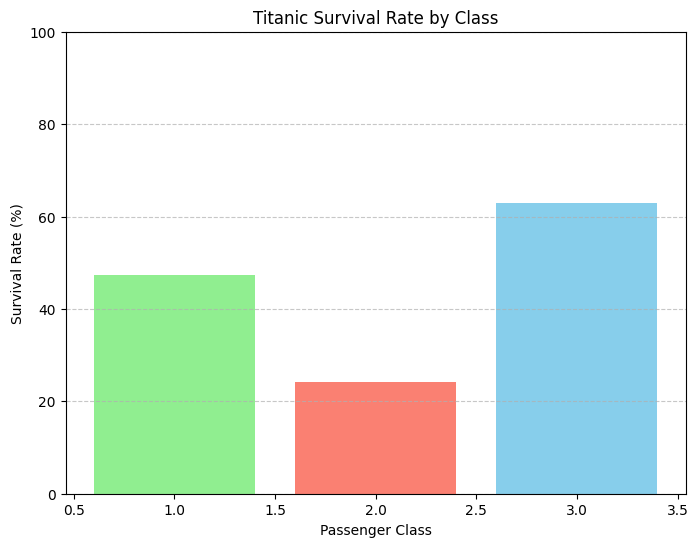

2025-10-28 00:07:44 <agent-senior> --- STEP 4 --- 

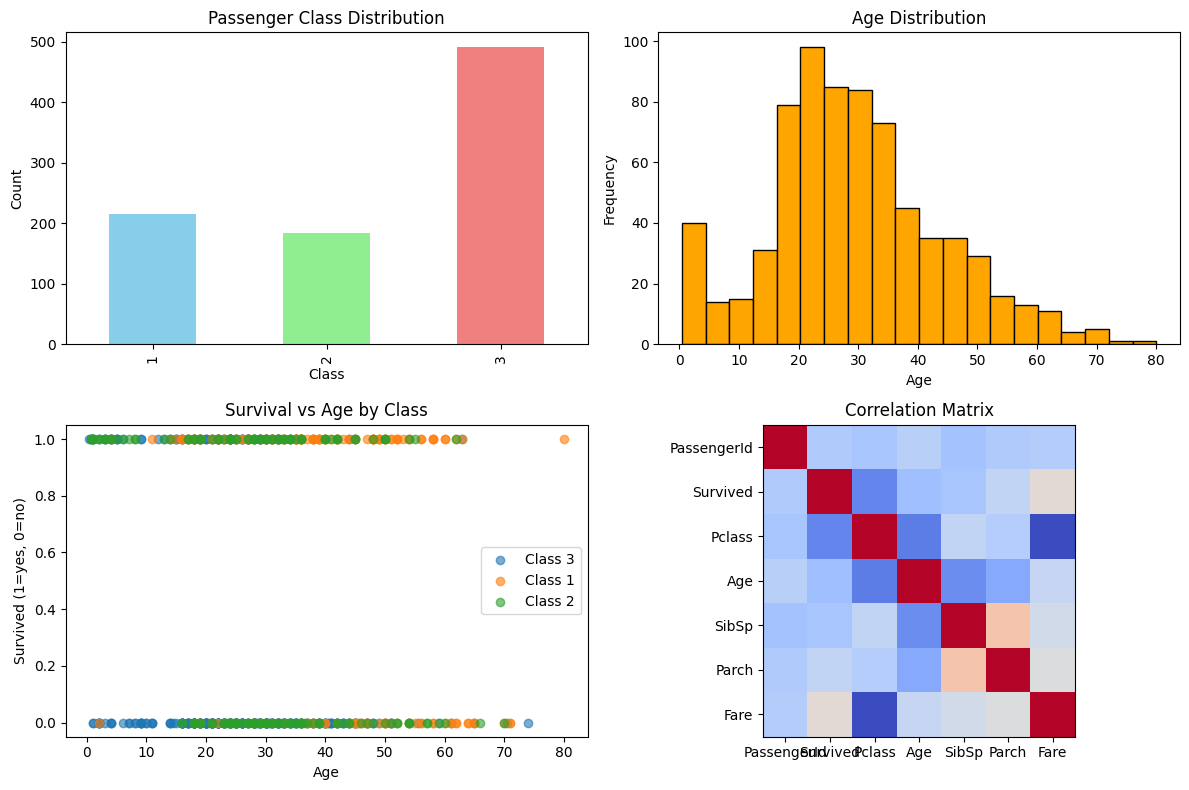

2025-10-28 00:10:48 <agent-senior> --- STEP 5 --- 

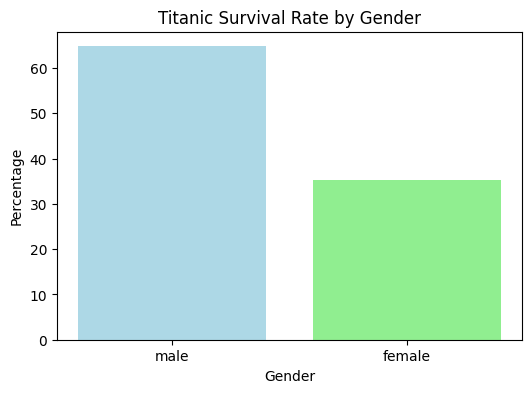

2025-10-28 00:13:02 <agent-senior> --- STEP 6 --- 

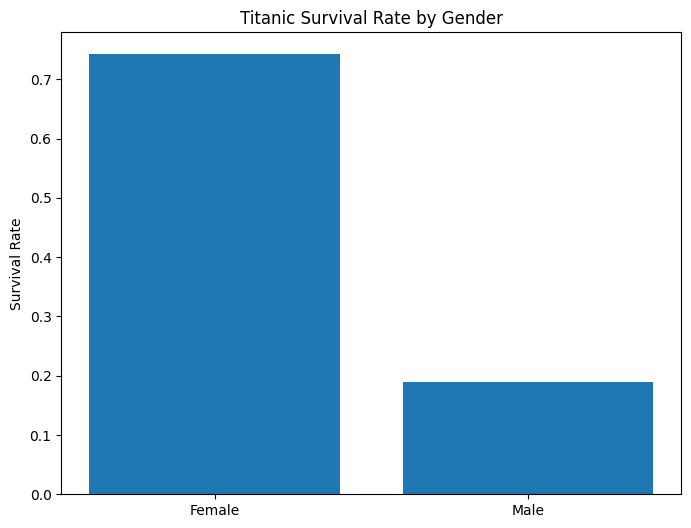

<agent-senior>
╭───────────────────────────────────────────── TOOL CODE_EXEC RESULT ─────────────────────────────────────────────╮
│ First 5 rows:                                                                                                   │
│    PassengerId  Survived  Pclass  \                                                                             │
│ 0            1         0       3                                                                                │
│ 1            2         1       1                                                                                │
│ 2            3         1       3                                                                                │
│ 3            4         1       1                                                                                │
│ 4            5         0       3                                                                                │
│                                                                                                                 │
│                                                 Name     Sex   Age  SibSp  \                                    │
│ 0                            Braund, Mr. Owen Harris    male  22.0      1                                       │
│ 1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1                                       │
│ 2                             Heikkinen, Miss. Laina  female  26.0      0                                       │
│ 3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1                                       │
│ 4                           Allen, Mr. William Henry    male  35.0      0                                       │
│                                                                                                                 │
│    Parch            Ticket     Fare Cabin Embarked                                                              │
│ 0      0         A/5 21171   7.2500   NaN        S                                                              │
│ 1      0          PC 17599  71.2833   C85        C                                                              │
│ 2      0  STON/O2. 3101282   7.9250   NaN        S                                                              │
│ 3      0            113803  53.1000  C123        S                                                              │
│ 4      0            373450   8.0500   NaN        S                                                              │
│                                                                                                                 │
│ Data summary:                                                                                                   │
│        PassengerId    Survived      Pclass         Age       SibSp  \                                           │
│ count   891.000000  891.000000  891.000000  714.000000  891.000000                                              │
│ mean    446.000000    0.383838    2.308642   29.699118    0.523008                                              │
│ std     257.353842    0.486592    0.836071   14.526497    1.102743                                              │
│ min       1.000000    0.000000    1.000000    0.420000    0.000000                                              │
│ 25%     223.500000    0.000000    2.000000   20.125000    0.000000                                              │
│ 50%     446.000000    0.000000    3.000000   28.000000    0.000000                                              │
│ 75%     668.500000    1.000000    3.000000   38.000000    1.000000                                              │
│ max     891.000000    1.000000    3.000000   80.000000    8.000000                                              │
│                                                                                                                 │
│             Parch        Fare          

2025-10-28 00:14:36 <agent-senior> --- STEP 7 --- 

KeyboardInterrupt: 

In [11]:
os.environ["DATAPIZZA_AGENT_LOG_LEVEL"] = "DEBUG"

prompt_1 = '''
You are a junior Python coder. You can generate code but you can't execute it. 
You receive a request from the Manager, and your final output must be Python code to pass on.
If you don't know some specific commands, you can use your tool and search the web for "how to ... with python?".
'''
agent_junior = Agent(name="agent-junior", client=ollama, system_prompt=prompt_1, 
                     tools=[DuckDuckGoSearchTool()])
agent_junior.can_call([agent_senior])

prompt_2 = '''
You are a senior Python coder. You check the code generated by the Junior, 
and use your tool to execute the code only if it's correct and safe.
'''
agent_senior = Agent(name="agent-senior", client=ollama, system_prompt=prompt_2, 
                     tools=[code_exec])

prompt_3 = '''
You know nothing, you're just a manager. After you get a request from the user, 
first you ask the Junior to generate the code, then you ask the Senior to execute it.
Finally, you report the result for the user.
'''
agent_manager = Agent(name="agent-manager", client=ollama, system_prompt=prompt_3, 
                      tools=[])
agent_manager.can_call([agent_junior, agent_senior])

q = '''
Plot the Titanic dataframe. You can find the data here: 
https://raw.githubusercontent.com/mdipietro09/DataScience_ArtificialIntelligence_Utils/master/machine_learning/data_titanic.csv
'''

agent_res = agent_manager.run(q)
#print(agent_res.text)